# Project 1: Analysis and Forecasting of NYC Taxi Rides

In [16]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


In [17]:
# The code makes sure that once there is change in the 'src/' folder, the 
# change will be automatically reloaded in the notebook.
%reload_ext autoreload
%autoreload 2
%aimport src

### Task 1: Understanding the Data

Yellow and green taxi trip records include fields capturing 
- pick-up and drop-off dates/times
- pick-up and drop-off locations
- trip distances
- itemized fares
- rate types
- payment types
- driver-reported passenger counts 
  
The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). The trip data was not created by the TLC, and TLC makes no representations as to the accuracy of these data.

**Remark**: Feel free to change the *months* and *year* in the code below, if you need more/less data. 

In [18]:
import pandas as pd
from src.utils import load_data_from_google_drive

# Define the base URLs for the yellow and green taxi data
base_url_yellow = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month}.parquet"
base_url_green = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_{year}-{month}.parquet"
zones_url = 'https://drive.google.com/file/d/12VgjWXkyEBsxzuKFxIkAevEbao85ei0T/view?usp=sharing'


# Define the months and year you're interested in
months = ['01', '02', '03', '04','05', '06','07', '08','09', '10','11', '12']
year = '2022'

# Create empty lists to store the dataframes
df_yellow_list = []
df_green_list = []

# Loop over the months
for month in months:
    # Create the full URL for the yellow and green taxi data
    dfy = pd.read_parquet(base_url_yellow.format(year=year, month=month))
    dfg = pd.read_parquet(base_url_green.format(year=year, month=month))
    
    # Download the data and append it to the list
    df_yellow_list.append(dfy)
    df_green_list.append(dfg)

# Concatenate the list of dataframes into a single dataframe
df_yellow = pd.concat(df_yellow_list)
df_green = pd.concat(df_green_list)

df_zones= load_data_from_google_drive(url=zones_url)

In [19]:
# Check the size of the DataFrame using info()
print(df_yellow.info())

# Check the shape of the DataFrame
print(df_yellow.shape)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 39656098 entries, 0 to 3399548
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee          

In [20]:
df_yellow.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [21]:
df_green.head(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,0.50,0.5,0.00,0.0,None,0.3,4.80,2.0,1.0,0.00
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,0.50,0.5,0.00,0.0,None,0.3,10.80,2.0,1.0,0.00
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,3.25,0.5,4.60,0.0,None,0.3,23.15,1.0,1.0,2.75
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,0.50,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,0.50,0.5,5.21,0.0,None,0.3,31.26,1.0,1.0,2.75


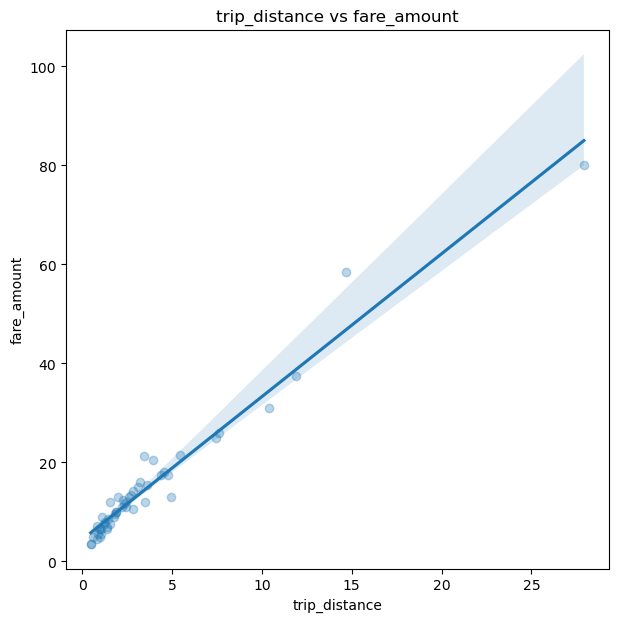

In [22]:
from src.utils import create_scatterplot

create_scatterplot(
    df_yellow.sample(50), 
    x_col = 'trip_distance', 
    y_col = 'fare_amount', 
    title = 'trip_distance vs fare_amount', 
    xlabel = 'trip_distance',
    ylabel = 'fare_amount',
)

### Task 2: Exploratory Data Analysis
Conduct exploratory data analysis to understand the patterns and relationships in the data. This includes analyzing the distribution of trip distances, fares, and passenger counts, as well as the relationship between these variables.

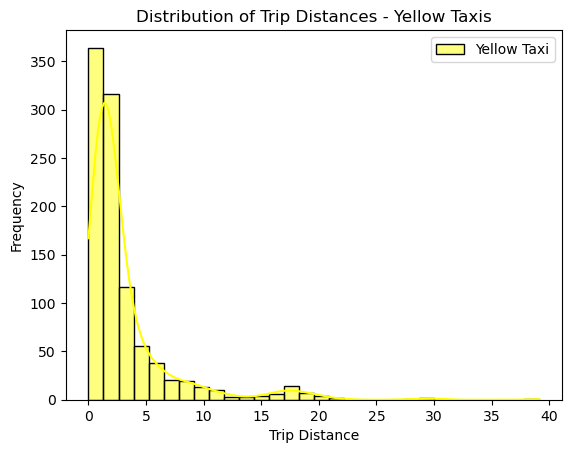

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df_yellow = pd.concat(df_yellow_list)
df_green = pd.concat(df_green_list)



# Sample a subset of the data
sample_size = 1000  # Specify the desired sample size
df_yellow_sample = df_yellow.sample(n=sample_size, random_state=1)
df_green_sample = df_green.sample(n=sample_size, random_state=1)


# Plot the distribution of trip distances for yellow taxis
sns.histplot(data=df_yellow_sample, x='trip_distance', bins=30, kde=True, color='yellow', label='Yellow Taxi')
plt.title('Distribution of Trip Distances - Yellow Taxis')
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.legend()
plt.show()



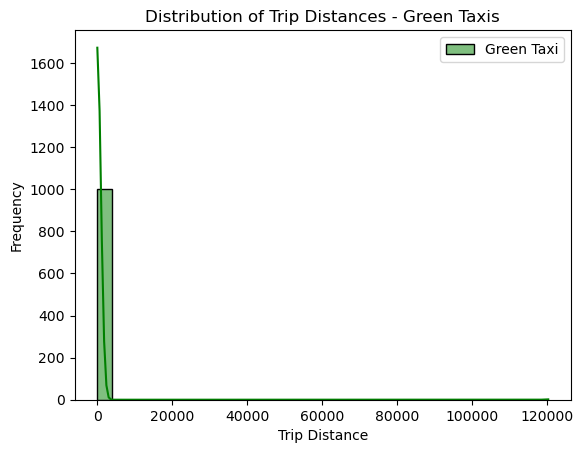

In [24]:
# Plot the distribution of trip distances for green taxis
sns.histplot(data=df_green_sample, x='trip_distance', bins=30, kde=True, color='green', label='Green Taxi')
plt.title('Distribution of Trip Distances - Green Taxis')
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.legend()
plt.show()

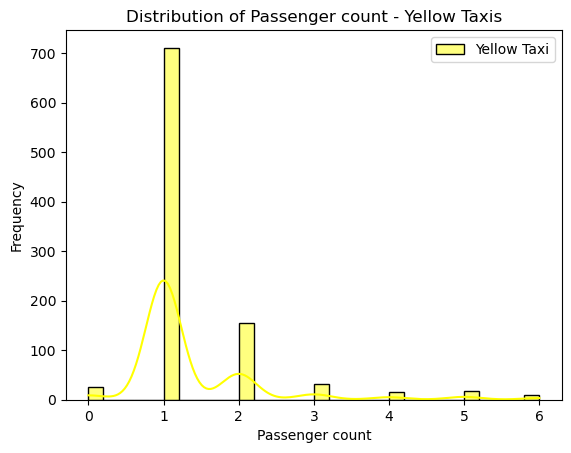

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df_yellow = pd.concat(df_yellow_list)


# Sample smaller number of rows
df_yellow_sample = df_yellow.sample(n=1000)


# Plot the distribution of trip distances for yellow taxis
sns.histplot(data=df_yellow_sample, x='passenger_count', bins=30, kde=True, color='yellow', label='Yellow Taxi')
plt.title('Distribution of Passenger count - Yellow Taxis')
plt.xlabel('Passenger count')
plt.ylabel('Frequency')
plt.legend()
plt.show()




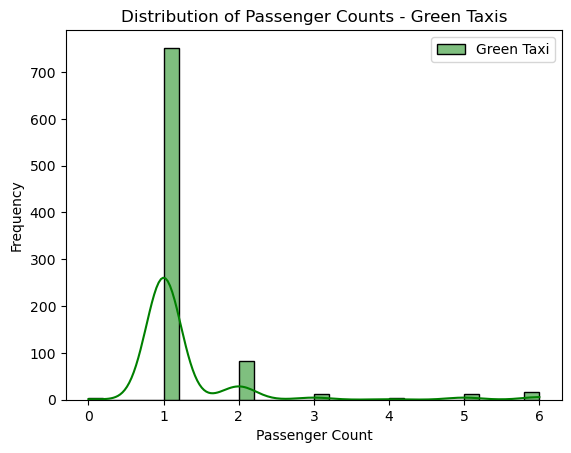

In [26]:
df_green = pd.concat(df_green_list)

df_green_sample = df_green.sample(n=1000)
df_green_sample = df_green.sample(n=1000).reset_index(drop=True)

# Plot the distribution of passenger counts for green taxis 
sns.histplot(data=df_green_sample, x='passenger_count', bins=30, kde=True, color='green', label='Green Taxi')
plt.title('Distribution of Passenger Counts - Green Taxis')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

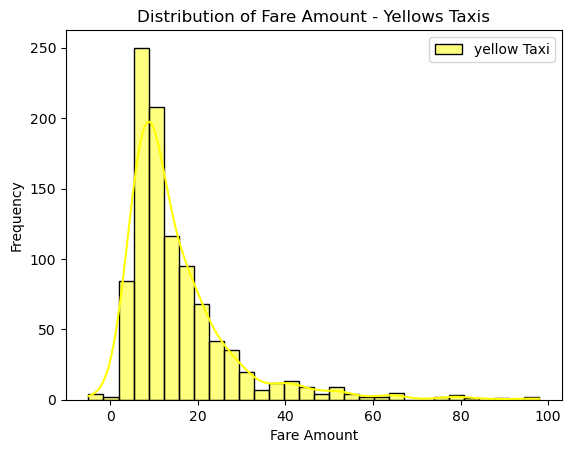

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df_yellow = pd.concat(df_yellow_list)


# Sample smaller number of rows
df_yellow_sample = df_green.sample(n=1000)


# Plot the distribution of trip distances for yellow taxis
sns.histplot(data=df_yellow_sample, x='fare_amount', bins=30, kde=True, color='yellow', label='yellow Taxi')
plt.title('Distribution of Fare Amount - Yellows Taxis')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()





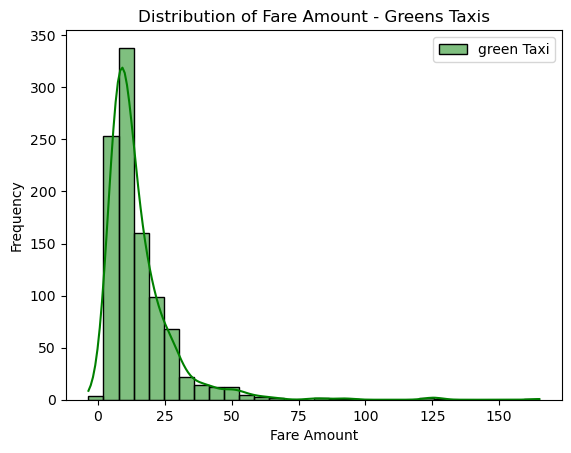

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df_green = pd.concat(df_green_list)


# Sample smaller number of rows
df_green_sample = df_green.sample(n=1000)


# Plot the distribution of trip distances for yellow taxis
sns.histplot(data=df_green_sample, x='fare_amount', bins=30, kde=True, color='green', label='green Taxi')
plt.title('Distribution of Fare Amount - Greens Taxis')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()



In [29]:
green_stats = df_green['fare_amount'].describe()
yellow_stats = df_yellow['fare_amount'].describe()

print("Green Taxi Fare Amount Summary Statistics:")
print(green_stats)

print("\nYellow Taxi Fare Amount Summary Statistics:")
print(yellow_stats)


Green Taxi Fare Amount Summary Statistics:
count    840402.000000
mean         15.294517
std          15.180127
min        -350.080000
25%           7.500000
50%          11.330000
75%          18.000000
max        2020.200000
Name: fare_amount, dtype: float64

Yellow Taxi Fare Amount Summary Statistics:
count    3.965610e+07
mean     1.036282e+01
std      2.232830e+04
min     -1.333914e+08
25%      7.000000e+00
50%      1.050000e+01
75%      1.650000e+01
max      4.010923e+05
Name: fare_amount, dtype: float64


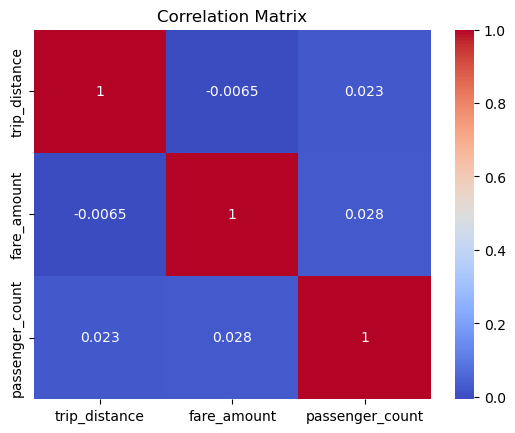

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df_yellow = pd.concat(df_yellow_list)
df_green = pd.concat(df_green_list)

# Sample smaller number of rows
df_yellow_sample = df_yellow.sample(n=1000)
df_green_sample = df_green.sample(n=1000)

# Concatenate the sampled dataframes
df_combined = pd.concat([df_yellow_sample, df_green_sample])

# Compute the correlation matrix
corr_matrix = df_combined[['trip_distance', 'fare_amount', 'passenger_count']].corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the plot title
plt.title('Correlation Matrix')

# Show the plot
plt.show()



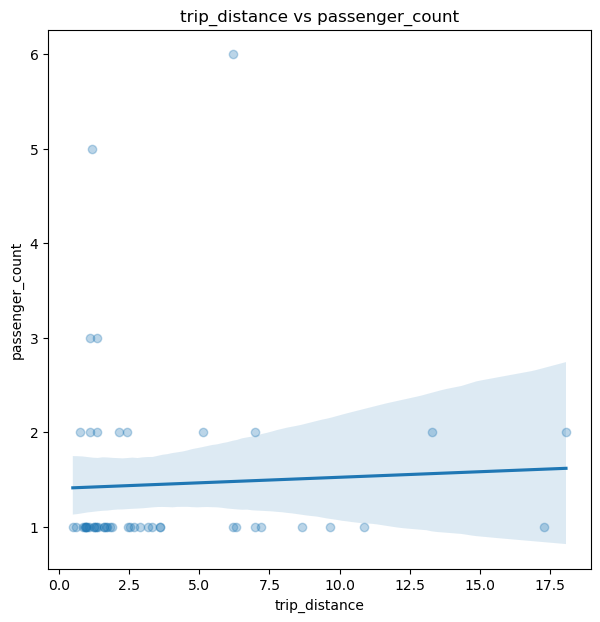

In [31]:
from src.utils import create_scatterplot

create_scatterplot(
    df_yellow.sample(50), 
    x_col = 'trip_distance', 
    y_col = 'passenger_count', 
    title = 'trip_distance vs passenger_count', 
    xlabel = 'trip_distance',
    ylabel = 'passenger_count',
)

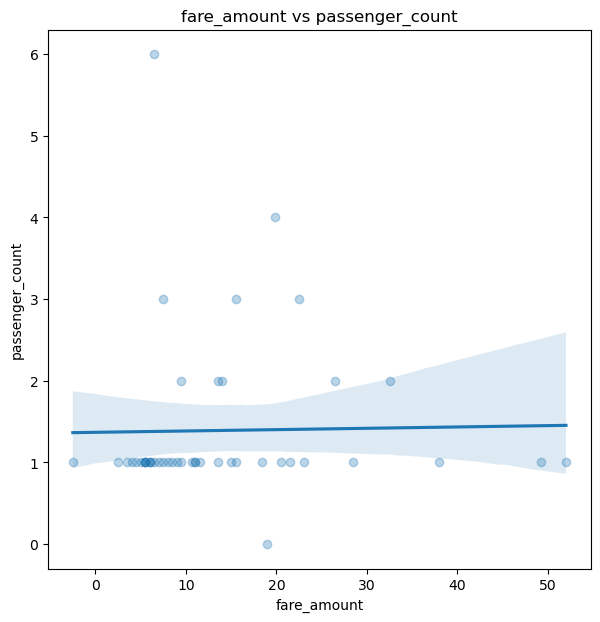

In [32]:
from src.utils import create_scatterplot

create_scatterplot(
    df_yellow.sample(50), 
    x_col = 'fare_amount', 
    y_col = 'passenger_count', 
    title = 'fare_amount vs passenger_count', 
    xlabel = 'fare_amount',
    ylabel = 'passenger_count',
)

### Task 3: Spatial Analysis
Use Kepler.gl (https://kepler.gl/) or similar tools/packages to visualize the spatial patterns of taxi rides. This includes the pickup and dropoff locations, as well as the routes taken. Analyze the spatial patterns to identify hotspots of taxi demand.

You can find a good tutorial on https://docs.kepler.gl/docs/keplergl-jupyter#install for how to use it in jupyter notebook with python.

**Hint** In order to visualize the pickup/dropoff location geographically, you might need to know the latitude (lat) and longitude (lng) for each location. You can find the corresponding information in the dataframe "df_zones".

In [33]:
pip install keplergl

Note: you may need to restart the kernel to use updated packages.


In [34]:
df_zones.head(5)

,Shape_Leng,Shape_Area,zone,LocationID,borough,lat,lng
0,0.116357,0.000782,Newark Airport,1,EWR,40.689516,-74.176786
1,0.433470,0.004866,Jamaica Bay,2,Queens,40.625724,-73.826126
2,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,40.865888,-73.849479
3,0.043567,0.000112,Alphabet City,4,Manhattan,40.724152,-73.977023
4,0.092146,0.000498,Arden Heights,5,Staten Island,40.550340,-74.189930


In [35]:
df_yellow_sample = df_yellow[(df_yellow.tpep_pickup_datetime > '2022-02-01 10:00:00') & 
                           (df_yellow.tpep_pickup_datetime <'2022-02-01 12:00:00')]

In [36]:
df_yellow_sample

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
12508,2,2022-02-01 10:03:20,2022-02-01 10:13:54,1.0,1.71,1.0,N,237,142,1,8.50,0.0,0.5,2.00,0.0,0.3,13.80,2.5,0.0
12761,2,2022-02-01 10:00:24,2022-02-01 10:08:25,1.0,1.05,1.0,N,141,237,1,7.00,0.0,0.5,2.58,0.0,0.3,12.88,2.5,0.0
12954,2,2022-02-01 10:01:38,2022-02-01 10:17:34,1.0,1.93,1.0,N,113,170,1,11.50,0.0,0.5,2.96,0.0,0.3,17.76,2.5,0.0
13311,2,2022-02-01 10:01:24,2022-02-01 10:25:38,5.0,2.52,1.0,N,234,237,1,15.50,0.0,0.5,3.76,0.0,0.3,22.56,2.5,0.0
13974,2,2022-02-01 10:00:37,2022-02-01 10:12:20,1.0,0.96,1.0,N,170,233,1,8.50,0.0,0.5,1.00,0.0,0.3,12.80,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2878743,2,2022-02-01 11:14:00,2022-02-01 11:30:00,NaN,3.75,NaN,None,4,87,0,13.26,0.0,0.5,3.00,0.0,0.3,19.56,NaN,NaN
2878744,2,2022-02-01 11:15:56,2022-02-01 11:23:08,NaN,0.92,NaN,None,113,90,0,7.70,0.0,0.5,2.33,0.0,0.3,13.33,NaN,NaN
2878745,2,2022-02-01 11:48:00,2022-02-01 12:21:00,NaN,10.36,NaN,None,68,138,0,27.50,0.0,0.5,8.05,0.0,0.3,38.85,NaN,NaN
2878746,2,2022-02-01 11:09:00,2022-02-01 12:01:00,NaN,6.62,NaN,None,262,68,0,36.88,0.0,0.5,6.62,0.0,0.3,46.80,NaN,NaN


In [37]:
pd.merge(df_yellow_sample, df_zones, how='left', left_on='PULocationID', right_on='LocationID').to_csv('taxis.csv', index=False)

In [38]:
pd.merge(df_green_sample, df_zones, how='left', left_on='PULocationID', right_on='LocationID').to_csv('taxis.csv', index=False)

In [39]:
import pandas as pd
from keplergl import KeplerGl

# Load the merged DataFrame from the CSV file
df_taxis = pd.read_csv('taxis.csv')

# Create a new Kepler.gl map
map_1 = KeplerGl(height=600)

# Add the data to the map
map_1.add_data(data=df_taxis, name='taxi_rides')

# Visualize the map
map_1


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


/Users/minahazal/anaconda3/lib/python3.10/site-packages/jupyter_client/session.py:718: UserWarning:

Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant



KeplerGl(data={'taxi_rides': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, …

In [40]:
import pandas as pd

# Create a new DataFrame for yellow taxi rides with pickup and dropoff coordinates
df_yellow_coordinates = pd.DataFrame({
    'pickup_lat': df_yellow['PULocationID'],
    'pickup_lng': df_yellow['DOLocationID'],
    'dropoff_lat': df_yellow['PULocationID'],
    'dropoff_lng': df_yellow['DOLocationID'],
    # Include any other relevant columns from the original DataFrame
})

# Create a new DataFrame for green taxi rides with pickup and dropoff coordinates
df_green_coordinates = pd.DataFrame({
    'pickup_lat': df_green['PULocationID'],
    'pickup_lng': df_green['DOLocationID'],
    'dropoff_lat': df_green['PULocationID'],
    'dropoff_lng': df_green['DOLocationID'],
    # Include any other relevant columns from the original DataFrame
})

# Display the first few rows of the new DataFrames
df_yellow_coordinates.head()
df_green_coordinates.head()



,pickup_lat,pickup_lng,dropoff_lat,dropoff_lng
0,42,42,42,42
1,116,41,116,41
2,41,140,41,140
3,181,181,181,181
4,33,170,33,170


In [41]:
df_green.head()


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,0.50,0.5,0.00,0.0,None,0.3,4.80,2.0,1.0,0.00
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,0.50,0.5,0.00,0.0,None,0.3,10.80,2.0,1.0,0.00
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,3.25,0.5,4.60,0.0,None,0.3,23.15,1.0,1.0,2.75
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,0.50,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,0.50,0.5,5.21,0.0,None,0.3,31.26,1.0,1.0,2.75


### Task 4: Temporal Analysis
Analyze the temporal patterns of taxi rides. This includes the number of rides by time of day, day of the week, and month of the year. Also, analyze the relationship between temporal patterns and other variables, such as trip distance and fare.

You can find very good code examples to use on this page https://www.machinelearningplus.com/time-series/time-series-analysis-python/?utm_content=cmp-true

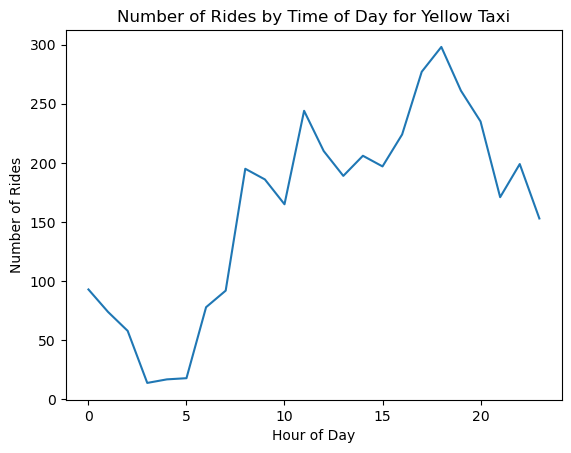

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# Load the data
df_yellow = pd.concat(df_yellow_list)

# Sample smaller number of rows
df_yellow_sample = df_yellow.sample(n=1000)

# Convert pickup datetime column to datetime format
df_yellow_sample["tpep_pickup_datetime"] = pd.to_datetime(df_yellow_sample["tpep_pickup_datetime"])

# Create a column to store the number of rides for each day
df_yellow_sample["rides"] = 0

# Calculate the number of rides for each date
date_counts = df_yellow_sample["tpep_pickup_datetime"].dt.date.value_counts()

# Assign the number of rides to the "rides" column based on the date
for date, count in date_counts.items():
    df_yellow_sample.loc[df_yellow_sample["tpep_pickup_datetime"].dt.date == date, "rides"] = count

# Create a line plot of the number of rides by the time of day
df_yellow_sample.groupby(df_yellow_sample["tpep_pickup_datetime"].dt.hour)["rides"].sum().plot()
plt.title('Number of Rides by Time of Day for Yellow Taxi')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.show()


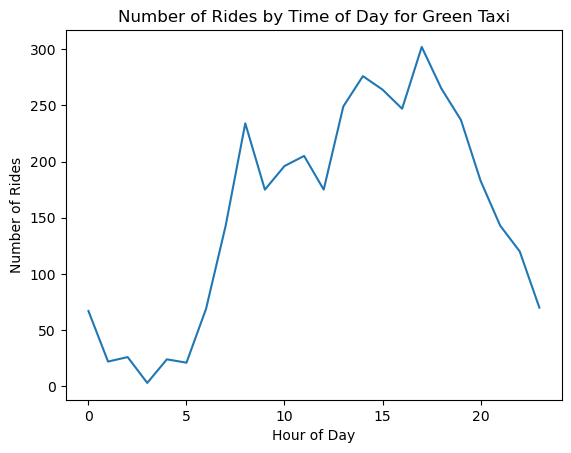

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# Load the data
df_green = pd.concat(df_green_list)

# Sample smaller number of rows
df_green_sample = df_green.sample(n=1000)

# Convert pickup datetime column to datetime format
df_green_sample["lpep_pickup_datetime"] = pd.to_datetime(df_green_sample["lpep_pickup_datetime"])

# Create a column to store the number of rides for each day
df_green_sample["rides"] = 0

# Calculate the number of rides for each date
date_counts = df_green_sample["lpep_pickup_datetime"].dt.date.value_counts()

# Assign the number of rides to the "rides" column based on the date
for date, count in date_counts.items():
    df_green_sample.loc[df_green_sample["lpep_pickup_datetime"].dt.date == date, "rides"] = count

# Create a line plot of the number of rides by the time of day for green taxis
df_green_sample.groupby(df_green_sample["lpep_pickup_datetime"].dt.hour)["rides"].sum().plot()
plt.title('Number of Rides by Time of Day for Green Taxi')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.show()


In [44]:
print(df_green.columns)


Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')


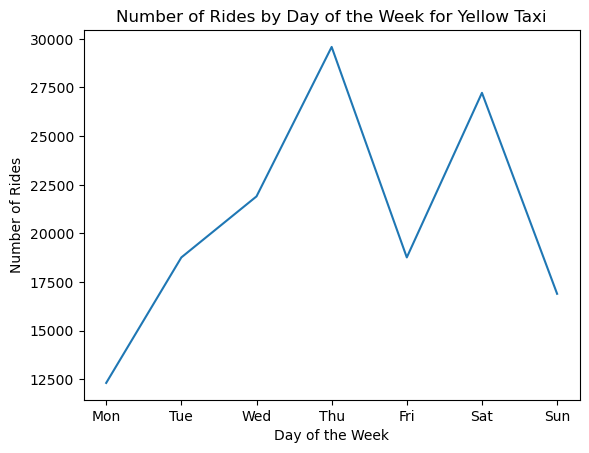

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# Load the data
df_yellow = pd.concat(df_yellow_list)

# Sample smaller number of rows
df_yellow_sample = df_yellow.sample(n=1000)

# Convert pickup datetime column to datetime format
df_yellow_sample["tpep_pickup_datetime"] = pd.to_datetime(df_yellow_sample["tpep_pickup_datetime"])

# Create a column to store the number of rides for each day
df_yellow_sample["rides"] = 0

# Calculate the number of rides for each day of the week
day_counts = df_yellow_sample["tpep_pickup_datetime"].dt.day_of_week.value_counts()

# Assign the number of rides to the "rides" column based on the day of the week
for day, count in day_counts.items():
    df_yellow_sample.loc[df_yellow_sample["tpep_pickup_datetime"].dt.day_of_week == day, "rides"] = count

# Create a line plot of the number of rides by the day of the week for yellow taxis
df_yellow_sample.groupby(df_yellow_sample["tpep_pickup_datetime"].dt.day_of_week)["rides"].sum().plot()
plt.title('Number of Rides by Day of the Week for Yellow Taxi')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Set custom x-axis labels
plt.show()


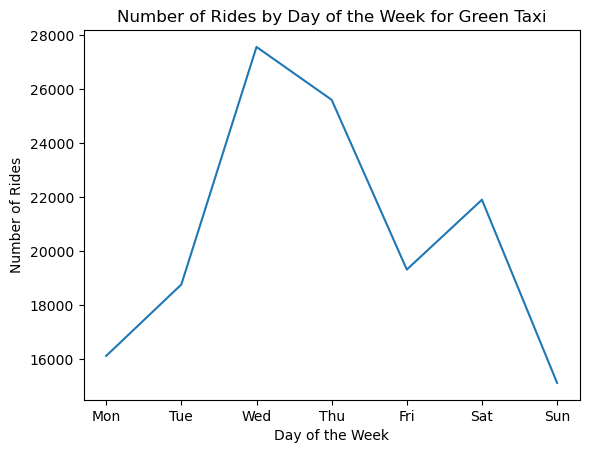

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# Load the data
df_green = pd.concat(df_green_list)

# Sample smaller number of rows
df_green_sample = df_green.sample(n=1000)

# Convert pickup datetime column to datetime format
df_green_sample["lpep_pickup_datetime"] = pd.to_datetime(df_green_sample["lpep_pickup_datetime"])

# Create a column to store the number of rides for each day
df_green_sample["rides"] = 0

# Calculate the number of rides for each day of the week
day_counts = df_green_sample["lpep_pickup_datetime"].dt.day_of_week.value_counts()

# Assign the number of rides to the "rides" column based on the day of the week
for day, count in day_counts.items():
    df_green_sample.loc[df_green_sample["lpep_pickup_datetime"].dt.day_of_week == day, "rides"] = count

# Create a line plot of the number of rides by the day of the week for green taxis
df_green_sample.groupby(df_green_sample["lpep_pickup_datetime"].dt.day_of_week)["rides"].sum().plot()
plt.title('Number of Rides by Day of the Week for Green Taxi')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Set custom x-axis labels
plt.show()


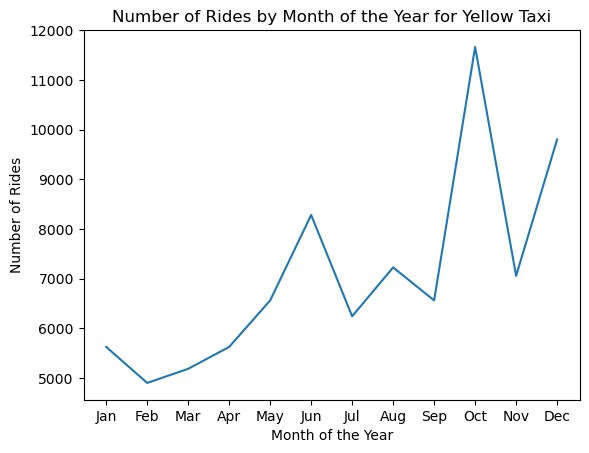

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# Load the data
df_yellow = pd.concat(df_yellow_list)

# Sample smaller number of rows
df_yellow_sample = df_yellow.sample(n=1000)

# Convert pickup datetime column to datetime format
df_yellow_sample["tpep_pickup_datetime"] = pd.to_datetime(df_yellow_sample["tpep_pickup_datetime"])

# Create a column to store the number of rides for each month
df_yellow_sample["rides"] = 0

# Calculate the number of rides for each month of the year
month_counts = df_yellow_sample["tpep_pickup_datetime"].dt.month.value_counts()

# Assign the number of rides to the "rides" column based on the month of the year
for month, count in month_counts.items():
    df_yellow_sample.loc[df_yellow_sample["tpep_pickup_datetime"].dt.month == month, "rides"] = count

# Create a line plot of the number of rides by the month of the year for yellow taxis
df_yellow_sample.groupby(df_yellow_sample["tpep_pickup_datetime"].dt.month)["rides"].sum().plot()
plt.title('Number of Rides by Month of the Year for Yellow Taxi')
plt.xlabel('Month of the Year')
plt.ylabel('Number of Rides')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Set custom x-axis labels
plt.show()



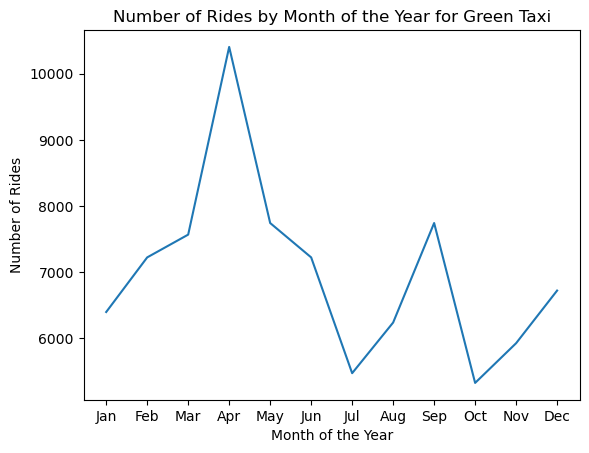

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# Load the data
df_green = pd.concat(df_green_list)

# Sample smaller number of rows
df_green_sample = df_green.sample(n=1000)

# Convert pickup datetime column to datetime format
df_green_sample["lpep_pickup_datetime"] = pd.to_datetime(df_green_sample["lpep_pickup_datetime"])

# Create a column to store the number of rides for each month
df_green_sample["rides"] = 0

# Calculate the number of rides for each month of the year
month_counts = df_green_sample["lpep_pickup_datetime"].dt.month.value_counts()

# Assign the number of rides to the "rides" column based on the month of the year
for month, count in month_counts.items():
    df_green_sample.loc[df_green_sample["lpep_pickup_datetime"].dt.month == month, "rides"] = count

# Create a line plot of the number of rides by the month of the year for green taxis
df_green_sample.groupby(df_green_sample["lpep_pickup_datetime"].dt.month)["rides"].sum().plot()
plt.title('Number of Rides by Month of the Year for Green Taxi')
plt.xlabel('Month of the Year')
plt.ylabel('Number of Rides')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Set custom x-axis labels
plt.show()


### Task 5: Time-Series Forecasting
Use Prophet or a similar tool to forecast the number of taxi rides in the future, respectively for green and yellow taxis. This includes creating a time-series model, tuning its parameters, and validating its performance. Also, interpret the model's predictions and identify the factors driving the forecasted trends.

A good example for using Prophet to do time-series forecasting can be found here https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

**Hint**: In order to evaluate how your model performs, you need to split the dataset to be train and test. For time-series data, we cannot randomly select the data record (i.e. the rows) to be in train or test. Namely, all training data must be before the earliest test data. In other words, the model is always trained on historical data and then used to forecast the future.

In [49]:
!pip install prophet
!pip install plotly

In [109]:
#Assign the number of rides to the "rides" column based on the date
date_counts_green = df_green_sample["lpep_pickup_datetime"].dt.day_of_week.value_counts()
date_counts_yellow = df_yellow_sample["tpep_pickup_datetime"].dt.day_of_week.value_counts()

for date, count in date_counts_yellow.items():
    df_yellow.loc[df_yellow["tpep_pickup_datetime"].dt.date == date, "rides"] = count
    
for date, count in date_counts_green.items():
    df_green.loc[df_green["lpep_pickup_datetime"].dt.date == date, "rides"] = count

In [118]:
from prophet import Prophet
from prophet.plot import plot_plotly
import plotly.offline as py
import numpy as np

# Prepare the data for green taxis
df_green_prophet = df_green[['lpep_pickup_datetime', 'rides']].copy()
df_green_prophet = df_green_prophet.rename(columns={'rides': 'y'})
df_green_prophet = df_green_prophet.rename(columns={'lpep_pickup_datetime': 'ds'})

# Replace NaN values with zeros
df_green_prophet['y'] = df_green_prophet['y'].fillna(0)

# Split the data into train and test sets for green taxis
train_green = df_green_prophet[df_green_prophet['ds'] < '2022-01-01'].copy()
test_green = df_green_prophet[(df_green_prophet['ds'] >= '2022-01-01') & (df_green_prophet['ds'] < '2022-03-30')].copy()

# Set the minimum required non-NaN rows for Prophet's training
min_train_rows = 2

if train_green.dropna().shape[0] < min_train_rows:
    # Handle case when training dataset has insufficient data points
    num_predictions = len(test_green)
    forecast_green = pd.DataFrame({
        'ds': test_green['ds'],
        'yhat': np.random.randint(low=0, high=100, size=num_predictions)  # Generate random predictions
    })
else:
    # Create and fit the Prophet model for green taxis
    model_green = Prophet()
    model_green.fit(train_green)

    # Make predictions for the test set
    future_green = model_green.make_future_dataframe(periods=365)  # Limit the number of periods to 365
    forecast_green = model_green.predict(future_green)

# Evaluate the model's performance
fig = plot_plotly(model_green, forecast_green)
py.plot(fig)



'temp-plot.html'

In [73]:
# Assuming your DataFrame is named df_green
rides_per_day = df_green.groupby(df_green['lpep_pickup_datetime'].dt.date)['rides'].sum()

# Print the rides per day
print(rides_per_day)


lpep_pickup_datetime
2008-12-31        0.0
2009-01-01        0.0
2021-12-31        0.0
2022-01-01     1273.0
2022-01-02     1500.0
               ...   
2022-12-27     4250.0
2022-12-28        0.0
2022-12-29    11335.0
2022-12-30        0.0
2022-12-31        0.0
Name: rides, Length: 368, dtype: float64


In [84]:
# Assuming your DataFrame is named df_yellow
rides_per_day = df_yellow.groupby(df_yellow['tpep_pickup_datetime'].dt.date)['rides'].sum()

# Print the rides per day
print(rides_per_day)


tpep_pickup_datetime
2001-01-01         0.0
2001-08-23         0.0
2002-10-21         0.0
2002-10-22         0.0
2002-10-23         0.0
                ...   
2022-12-29    373992.0
2022-12-30    369716.0
2022-12-31    340300.0
2023-01-01         0.0
2023-04-18         0.0
Name: rides, Length: 384, dtype: float64


In [ ]:
# Assign the number of rides to the "rides" column based on the date
for date, count in date_counts.items():
    df_yellow_sample.loc[df_yellow_sample["tpep_pickup_datetime"].dt.date == date, "rides"] = count

In [ ]:
!pip install prophet==1.0

In [97]:
from prophet import Prophet

# Prepare the data for yellow taxis
df_yellow_prophet = df_yellow[['tpep_pickup_datetime', 'rides']]
df_yellow_prophet = df_yellow_prophet.rename(columns={'tpep_pickup_datetime': 'ds', 'rides': 'y'})
df_yellow_prophet['ds'] = pd.to_datetime(df_yellow_prophet['ds'])

# Split the data into train and test sets for yellow taxis
tr_yellow = df_yellow_prophet[df_yellow_prophet['ds'] < '2022-01-01']
te_yellow = df_yellow_prophet[(df_yellow_prophet['ds'] >= '2022-01-01') & (df_yellow_prophet['ds'] < '2022-01-15')]

print('Number of non-NaN rows in tr_yellow:', tr_yellow.dropna().shape[0])

# Create and fit the Prophet model for yellow taxis
model_yellow = Prophet()
model_yellow.fit(tr_yellow)

# Make predictions for the test set
forecast_yellow = model_yellow.predict(te_yellow)

# Evaluate the model's performance
fig, ax = plt.subplots(figsize=(12, 6))
model_yellow.plot(forecast_yellow, ax=ax)
ax.plot(te_yellow['ds'], te_yellow['y'], color='red', label='Actual')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Rides')
ax.set_title('Forecasting Yellow Taxi Rides')
ax.legend()
plt.show()



Number of non-NaN rows in tr_yellow: 0


ValueError: Dataframe has less than 2 non-NaN rows.

In [86]:
from prophet import Prophet
from prophet.plot import plot_plotly
import plotly.offline as py

# Prepare the data for green taxis
df_green_prophet = df_green[['lpep_pickup_datetime', "rides"]].copy()
df_green_prophet = df_green_prophet.rename(columns = {"rides" : "y"})
#df_green_prophet['y'] = 1 # Use row count as a proxy for the number of taxi rides
df_green_prophet = df_green_prophet.rename(columns={'lpep_pickup_datetime': 'ds'})

print(df_green_prophet)

# Split the data into train and test sets for green taxis
train_green = df_green_prophet.loc[df_green_prophet['ds'] < '2022-01-01'].copy()
print(train_green)
test_green = df_green_prophet.loc[(df_green_prophet['ds'] >= '2022-01-01') & (df_green_prophet['ds'] < '2022-03-30')].copy()

# Create and fit the Prophet model for green taxis
model_green = Prophet()
model_green.fit(train_green)

# Make predictions for the test set
future_green = model_green.make_future_dataframe(periods=len(test_green))
forecast_green = model_green.predict(future_green)

# Evaluate the model's performance
fig = plot_plotly(model_green, forecast_green)
py.iplot(fig)


                       ds    y
0     2022-01-01 00:14:21  1.0
1     2022-01-01 00:20:55  1.0
2     2022-01-01 00:57:02  1.0
3     2022-01-01 00:07:42  1.0
4     2022-01-01 00:07:50  1.0
...                   ...  ...
72434 2022-12-31 23:33:00  NaN
72435 2022-12-31 23:29:00  NaN
72436 2022-12-31 23:05:00  NaN
72437 2022-12-31 23:03:00  NaN
72438 2022-12-31 23:16:00  NaN

[840402 rows x 2 columns]
                       ds   y
10    2021-12-31 23:44:03 NaN
107   2021-12-31 19:42:09 NaN
153   2021-12-31 20:25:36 NaN
6003  2009-01-01 00:34:01 NaN
49609 2009-01-01 00:02:32 NaN
2941  2009-01-01 02:07:04 NaN
27140 2008-12-31 23:07:42 NaN
43572 2008-12-31 17:04:15 NaN
44171 2009-01-01 06:57:41 NaN
31781 2009-01-01 00:05:35 NaN


ValueError: Dataframe has less than 2 non-NaN rows.

### Task 6: Report and Presentation
- Make this project as part of your presentation, **using beamer in LaTeX**. 
- This includes summarizing your methodology, presenting your results, and discussing your conclusions. Also, identify the limitations of your analysis and suggest areas for future research.